<a href="https://colab.research.google.com/github/jabazer/tao-fing/blob/master/M%C3%A9todosProximales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook mostramos los métodos proximales.

Se define el operador proximal del punto $z\in\mathbb R^N$, respecto a la función $f(x)$ como

\begin{align}
\text{prox}_{\lambda f}(z)&=\arg\min_{x\in \mathbb R^N} \lambda f(x) +\frac{1}{2} ||x-z||^2\\
&=\arg\min_{x\in \mathbb R^N}  f(x) +\frac{1}{2\lambda} ||x-z||^2
\end{align}


Ejemplo para $f(x)=||x||_1=\sum_{i=1}^N |x_i|$


\begin{align}
\text{prox}_{f}(z)&=\arg\min_{x\in \mathbb R^N} ||x||_1 + \frac{1}{2}||x-z||^2\\
\end{align}

Este problema es separable 

\begin{align}
\min_{x\in \mathbb R^N} ||x||_1 + \frac{1}{2}||x-z||^2&= \sum_{i=1}^N\min_{x_i\in \mathbb R} (|x_i| + \frac{1}{2}(x_i-z_i)^2) \\
\end{align}

Y el argumento que minimiza cada problema por separado es

\begin{align}
\arg\min_{x_i\in \mathbb R}& |x_i| + \frac{1}{2}(x_i-z_i)^2
 \end{align}

 $$=\begin{cases}z_i-1\ \iff \ z_i\geq 1\\
0\ \iff  z_i\in[1-,1]\\
z_i+1 \iff z_i\leq -1\end{cases}$$



In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt



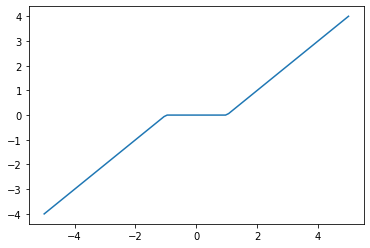

In [ ]:
def soft_tresholding(z,l):
 
 x=0
 if z>=l:
   x=z-l
 if z<=-l:
   x=z+l
 return x

def prox_l1norm(zs,l):
  xs=np.array([])
  for z in zs:
    x=soft_tresholding(z,l)
    xs=np.append(xs,x)
  return xs  

zs=np.linspace(-5,5,100)
xs=prox_l1norm(zs,1)


plt.plot(zs,xs)
plt.show()




Ahora utilizemos el operador proximal para minimizar $||x||_1$

Recordar:  $$1)\ x^\star \text{ es mínimo de } f(x) \iff \  x^\star=prox_f(x^\star)$$

$$2)\ x^\star \text{ es punto límite de } x^{k+1}=prox_f(x^k)$$

El punto 1) es inmediato de probar, la prueba de 2) es más eleborada 

Veamos el algoritmo 2) en acción para $f(x)=||x||_1$

$$ x^{k+1}=prox_{||x||_1}(x^k)= \text{soft_thresholding}(x^k)$$


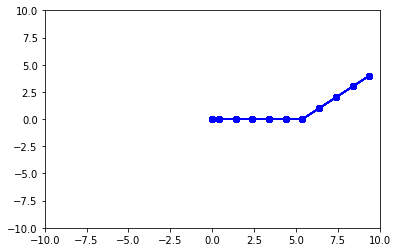

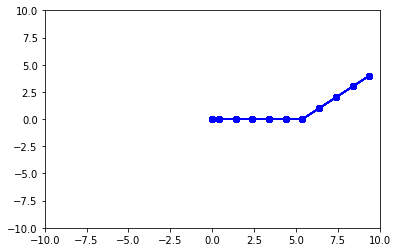

In [ ]:
import time
from IPython import display
import pylab as pl
x=np.array([10.4,5])
trayectoria0=np.array([])
trayectoria1=np.array([])
for k in np.arange(20): 
  x=prox_l1norm(x,1)
  trayectoria0=np.append(trayectoria0,x[0])
  trayectoria1=np.append(trayectoria1,x[1])
  pl.plot(trayectoria0,trayectoria1,'bo-')
  pl.xlim(-10, 10)
  pl.ylim(-10, 10)
  display.clear_output(wait=True)
  display.display(pl.gcf())
  

  time.sleep(1)
  

#Approximación de Euler  


Si consideramos la ecuación diferencial 

$$\dot x(t)=-\nabla f(x(t))$$

y la discretizamos hacia atrás

$$\frac{x^{k+1}-x^k}{h}=-\nabla f(x^{k+1})$$
entonces

$$x^{k+1}+h\nabla f(x^{k+1})=x^k$$
$$x^{k+1}-x^k+h\nabla f(x^{k+1})=0$$
$$\frac{1}{2}||x^{k+1}-x^k||^2+h f(x^{k+1})$$

y esto coincide con $$x^{k+1}=\text{prox}_{hf}(x^k)$$


#Proximal Gradient method

Se quiere minimizar $f(x)+g(x)$ suma de una función $f(x)$ conveza diferenciable y una función $g(x)$ con un operador proximal sencillo
Entonces la siguiente iteración da el óptimo

$$x^{k+1}=\text{prox}_{\lambda g}(x^k-\lambda\nabla f(x^k))$$

Podemos pensarla en dos pasos por iteración



\begin{align}
y^{k+1}&=x^k-\lambda\nabla f(x^k)\\
x^{k+1}&=\text{prox}_{\lambda g}(y^{k+1})
\end{align}

De esta forma $y^{k+1}$ corresponde a movernos por el gradiente en la dirección del mínimo de $f(x)$, mientras que el operador proximal en el segundo paso se mueve hacia el mínimo de $g(x)$ sin alejarse mucho de $y^{k+1}$, de forma de no perder la información de    $f(x)$

Veámoslo en acción para resolver 

\begin{align}
\min_{x\in \mathbb R^N} &\sum_{i=1}^N\log(1/(1+a^Tx))+||x||_1
\end{align}

El proximal gradient method para este ejemplo toma la forma

\begin{align}
y^{k+1}&=x^k+\frac{1}{1+a^Tx} \lambda a\\
x_i^{k+1}&=\text{soft_thresholding}(y_i^{k+1})
\end{align}

Veámoslo en acción para $a=(1,2)^T$




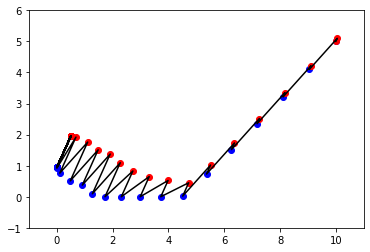

x= [0.   0.95]
y= [0.5  1.95]


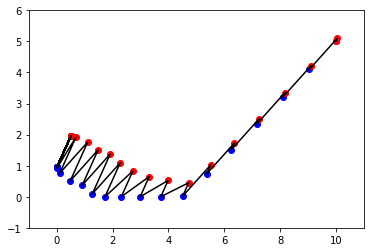

x= [0.   0.95]
y= [0.5  1.95]


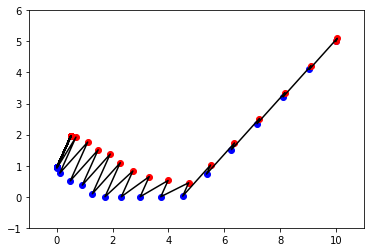

x= [0.   0.95]
y= [0.5  1.95]


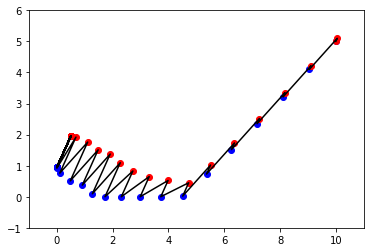

x= [0.   0.95]
y= [0.5  1.95]


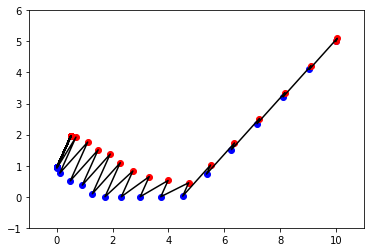

x= [0.   0.95]
y= [0.5  1.95]


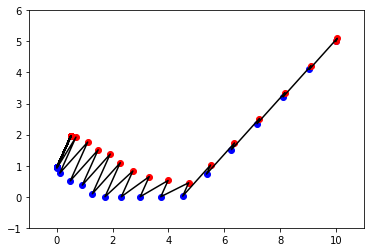

x= [0.   0.95]
y= [0.5  1.95]


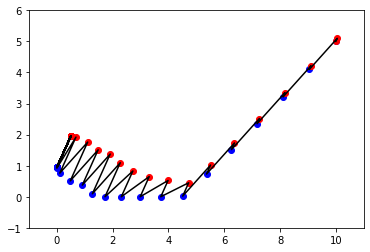

x= [0.   0.95]
y= [0.5  1.95]


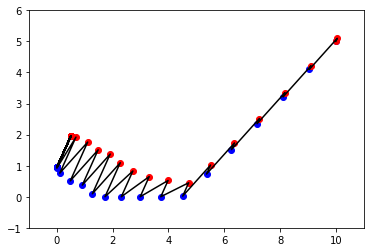

x= [0.   0.95]
y= [0.5  1.95]


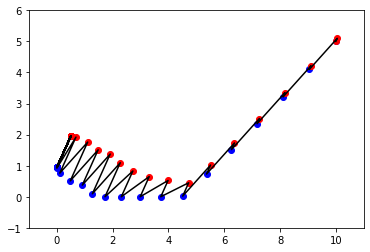

x= [0.   0.95]
y= [0.5  1.95]


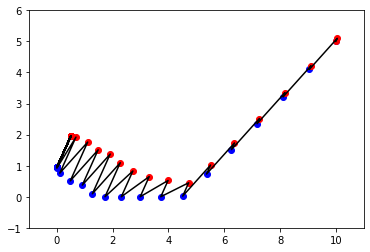

x= [0.   0.95]
y= [0.5  1.95]


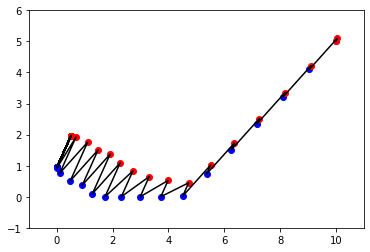

x= [0.   0.95]
y= [0.5  1.95]


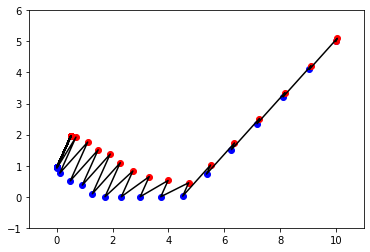

x= [0.   0.95]
y= [0.5  1.95]


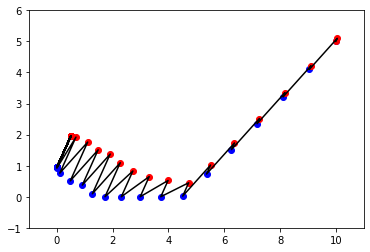

x= [0.   0.95]
y= [0.5  1.95]


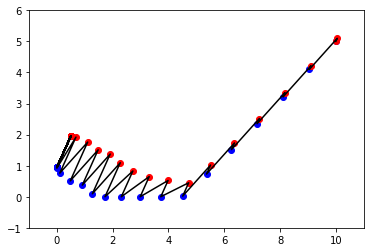

x= [0.   0.95]
y= [0.5  1.95]


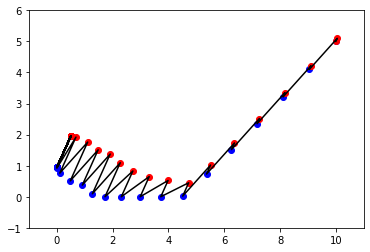

x= [0.   0.95]
y= [0.5  1.95]


In [ ]:
x=np.array([10,5])
y=np.array([10,5])
a=np.array([10,20])
lambd=1
x0s=np.array([])
x1s=np.array([])
y0s=np.array([])
y1s=np.array([])
xy0s=np.array([])
xy1s=np.array([])

for k in np.arange(50): 
  
  x0s=np.append(x0s,x[0])
  x1s=np.append(x1s,x[1])
  y0s=np.append(y0s,y[0])
  y1s=np.append(y1s,y[1])
  xy0s=np.append(xy0s,y[0])
  xy0s=np.append(xy0s,x[0])
  xy1s=np.append(xy1s,y[1])
  xy1s=np.append(xy1s,x[1])
  plt.plot(x0s,x1s,'bo',y0s,y1s,'ro',xy0s,xy1s,'k')
  plt.xlim(-1, 11)
  plt.ylim(-1, 6)
  
  plt.show()
  
  #display.clear_output(wait=True)
  #display.display(pl.gcf())
  print('x=', x)
  print('y=', y)

  time.sleep(1)
  y=x+lambd*a/(1+np.dot(a,x))
  x=prox_l1norm(y,lambd)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


z es
[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ 0.95512546  0.94920198  0.94328217 ... -0.12294374 -0.11959851
  -0.11625284]
 [ 0.95529418  0.94937804  0.94346555 ... -0.12025685 -0.11691075
  -0.11356422]
 [ 0.95547756  0.94956871  0.94366347 ... -0.11756822 -0.11422126
  -0.11087386]]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


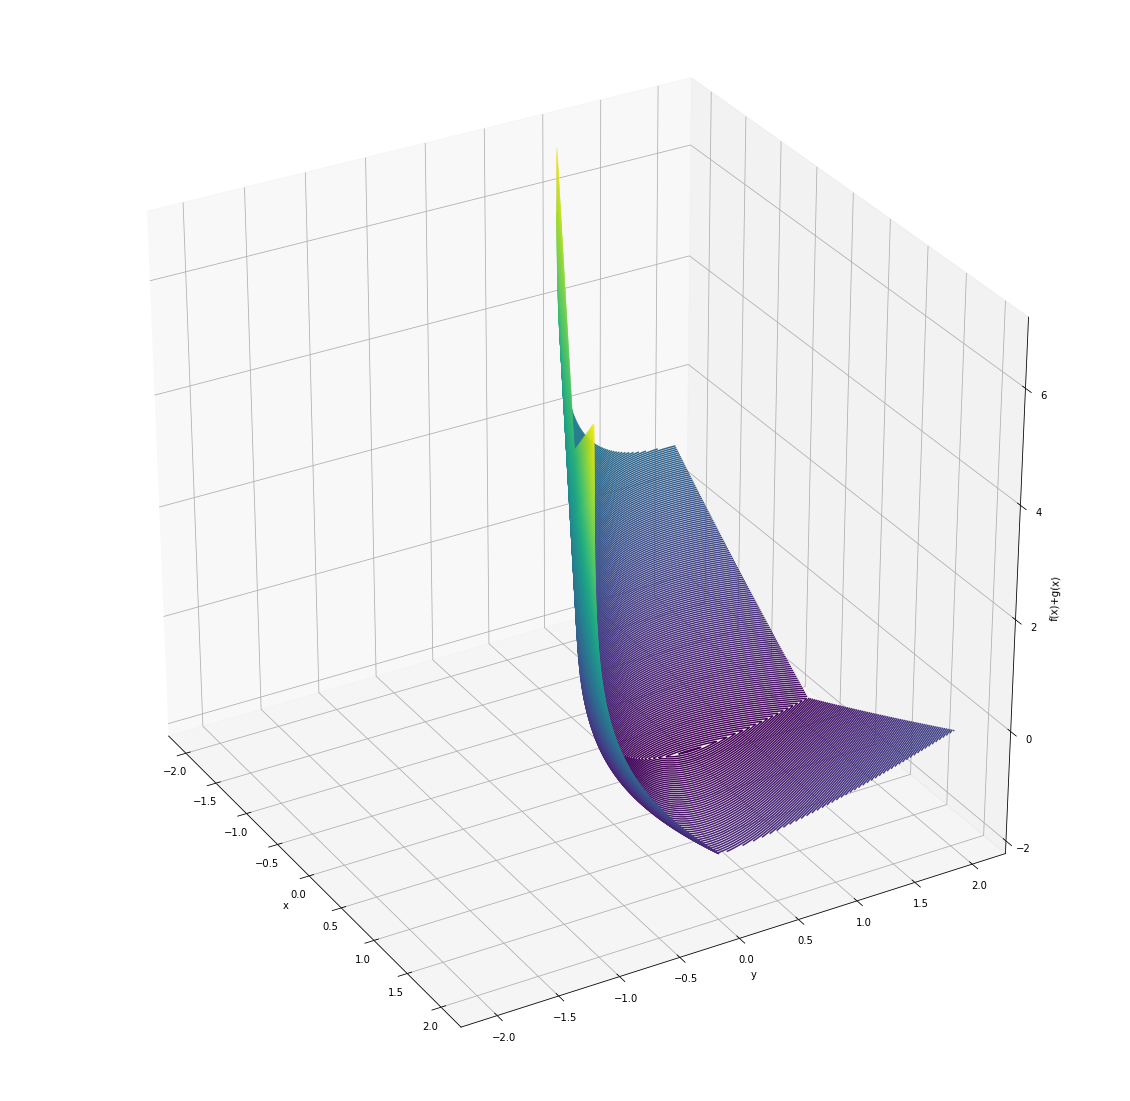

In [ ]:

from mpl_toolkits import mplot3d

def fyg(x0,x1,a):
      z=np.abs(x0)+np.abs(x1)+np.log(1/(1+a[0]*x0+a[1]*x1))
      #z=np.log(1/(1+a[0]*x0+a[1]*x1))
      print('z es')
      print(z )
      return z  


def FyG_mesh(X,Y,a):
      [K,M]=np.ndarray.size(X)
      for m in np.arange(M):
         for k in np.arange(K):
           x=X[k,m]
           y=Y[k,m]
           z=fyg(x,y,a)
           Z[k,m]=z
      
      return Z  


Nmesh=1000
x = np.linspace(-2, 2, Nmesh)
y = np.linspace(-2, 2, Nmesh)



X, Y = np.meshgrid(x, y)

Z = fyg(X, Y,a)





fig = plt.figure(figsize=(20,20))


ax = plt.axes(projection='3d')


ax.contour3D(X, Y, Z,500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x)+g(x)');
ax.view_init(30, -30)








#Alternating Direction Method of Multipliers

Se quiere resolver 

\begin{align}
\min_{x\ in\ \mathbb R^N, z\in \mathbb R^M }& f(x)+g(z)\\
\text{s. to: }& Ax=z
\end{align}

Caso 1: $A=I_{N\times N} \Rightarrow \ z=x$, con lo que nuevamente tenemos


\begin{align}
\min_{x\ in\ \mathbb R^N, z\in \mathbb R^M }& f(x)+g(z)\\
\text{s. to: }& x=z
\end{align}

o bien 

\begin{align}
\min_{x\ in\ \mathbb R^N }& f(x)+g(x)\\
\end{align}

Podríamos intentar (esto aún no es ADMM y veremos que falla)

\begin{align}
x^{k+1}&=\text{prox}_{\lambda f}\left(z^k\right)\\
z^{k+1}&=\text{prox}_{\lambda g}\left(x^{k+1}\right)\\
\end{align}


Probemos con $f(x)=||x||_1$ y $g(x)=\frac{1}{2} x^T Px + q^T +r$ con 


$$P=\begin{pmatrix}
1 & 0\\
0 & 1/2
\end{pmatrix}$$

$$q=-\begin{pmatrix}
2  \\
 1
\end{pmatrix}$$

$$r=3$$


En este caso
$g(x)=1/2(x_1-1)^2+1/4(x_2-1)^2$

Vease que  

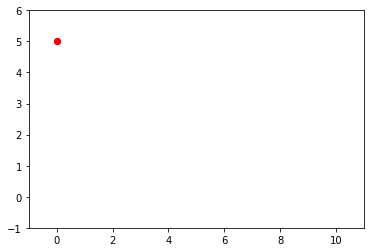

iteración  0
x= [0 5]
z= [0 5]


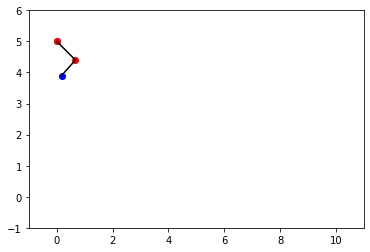

iteración  1
x= [0.16666667 3.9       ]
z= [0.66666667 4.4       ]


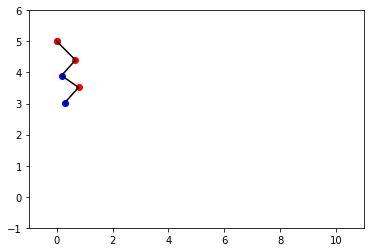

iteración  2
x= [0.27777778 3.02      ]
z= [0.77777778 3.52      ]


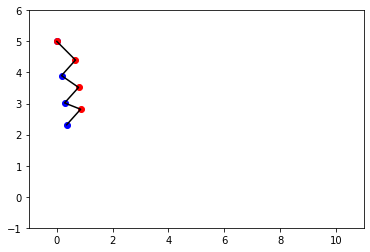

iteración  3
x= [0.35185185 2.316     ]
z= [0.85185185 2.816     ]


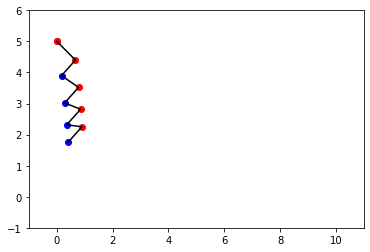

iteración  4
x= [0.40123457 1.7528    ]
z= [0.90123457 2.2528    ]


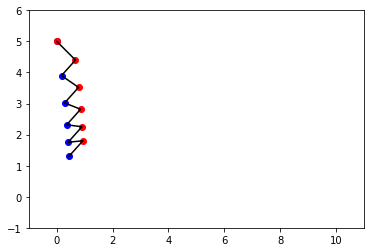

iteración  5
x= [0.43415638 1.30224   ]
z= [0.93415638 1.80224   ]


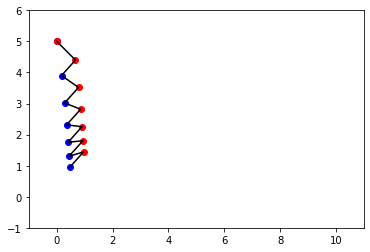

iteración  6
x= [0.45610425 0.941792  ]
z= [0.95610425 1.441792  ]


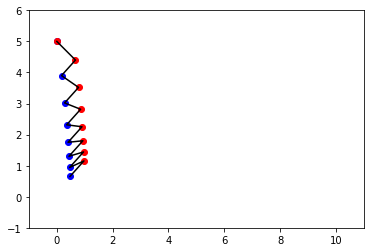

iteración  7
x= [0.47073617 0.6534336 ]
z= [0.97073617 1.1534336 ]


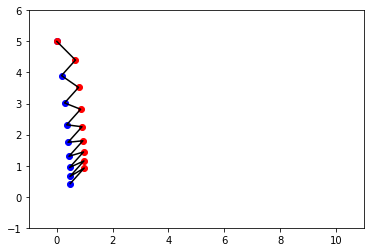

iteración  8
x= [0.48049078 0.42274688]
z= [0.98049078 0.92274688]


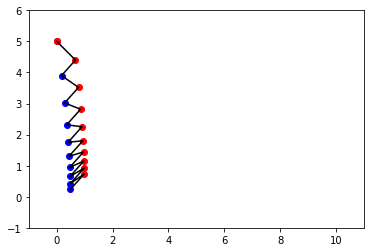

iteración  9
x= [0.48699385 0.2381975 ]
z= [0.98699385 0.7381975 ]


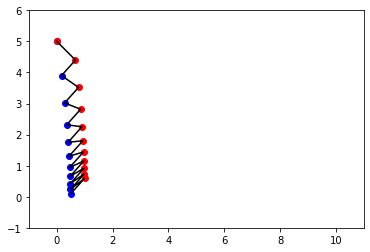

iteración  10
x= [0.49132924 0.090558  ]
z= [0.99132924 0.590558  ]


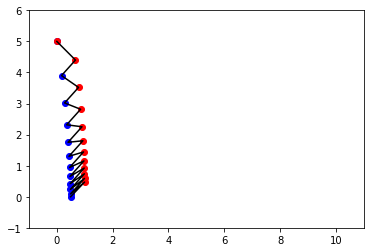

iteración  11
x= [0.49421949 0.        ]
z= [0.99421949 0.4724464 ]


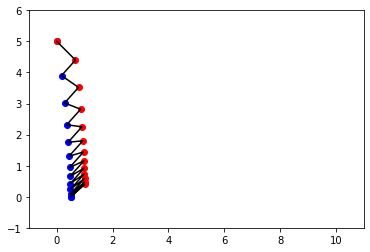

iteración  12
x= [0.49614633 0.        ]
z= [0.99614633 0.4       ]


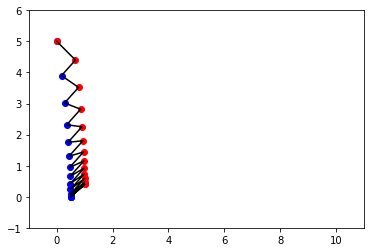

iteración  13
x= [0.49743088 0.        ]
z= [0.99743088 0.4       ]


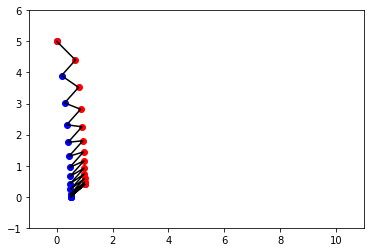

iteración  14
x= [0.49828726 0.        ]
z= [0.99828726 0.4       ]


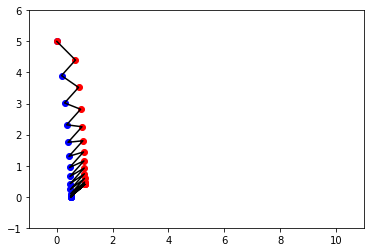

iteración  15
x= [0.49885817 0.        ]
z= [0.99885817 0.4       ]


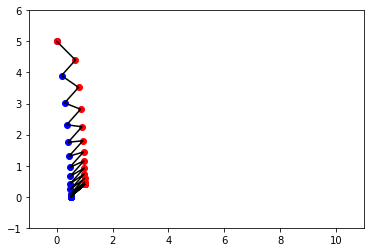

iteración  16
x= [0.49923878 0.        ]
z= [0.99923878 0.4       ]


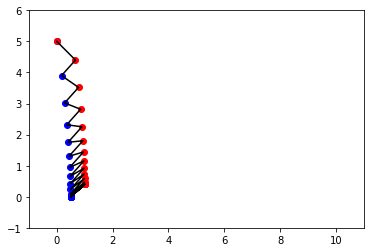

iteración  17
x= [0.49949252 0.        ]
z= [0.99949252 0.4       ]


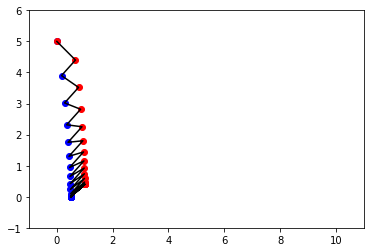

iteración  18
x= [0.49966168 0.        ]
z= [0.99966168 0.4       ]


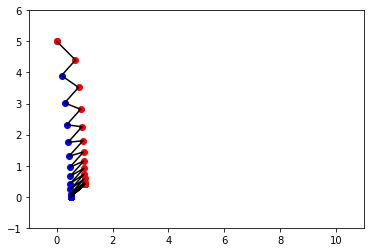

iteración  19
x= [0.49977445 0.        ]
z= [0.99977445 0.4       ]


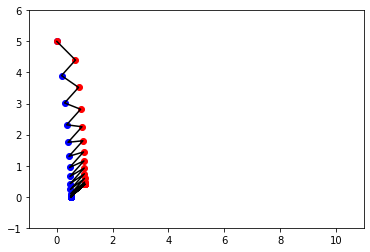

iteración  20
x= [0.49984964 0.        ]
z= [0.99984964 0.4       ]


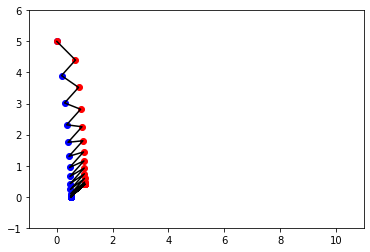

iteración  21
x= [0.49989976 0.        ]
z= [0.99989976 0.4       ]


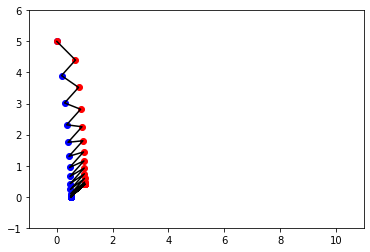

iteración  22
x= [0.49993317 0.        ]
z= [0.99993317 0.4       ]


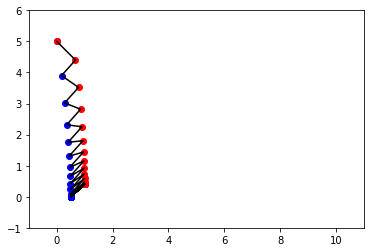

iteración  23
x= [0.49995545 0.        ]
z= [0.99995545 0.4       ]


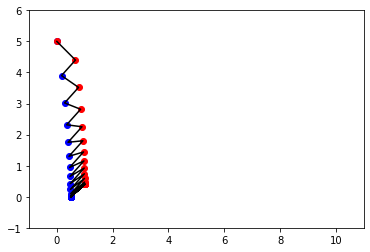

iteración  24
x= [0.4999703 0.       ]
z= [0.9999703 0.4      ]


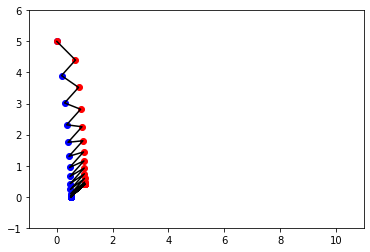

iteración  25
x= [0.4999802 0.       ]
z= [0.9999802 0.4      ]


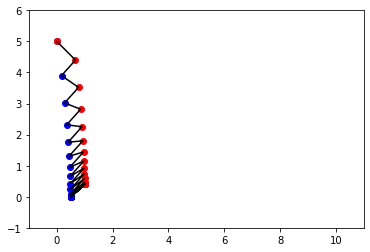

iteración  26
x= [0.4999868 0.       ]
z= [0.9999868 0.4      ]


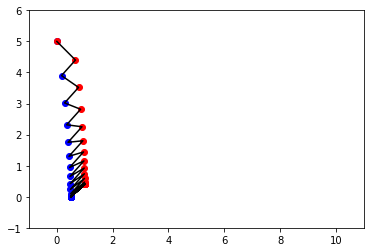

iteración  27
x= [0.4999912 0.       ]
z= [0.9999912 0.4      ]


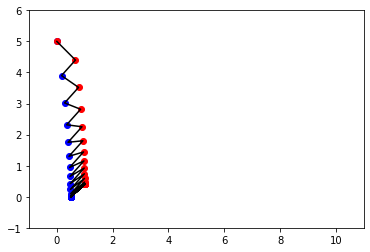

iteración  28
x= [0.49999413 0.        ]
z= [0.99999413 0.4       ]


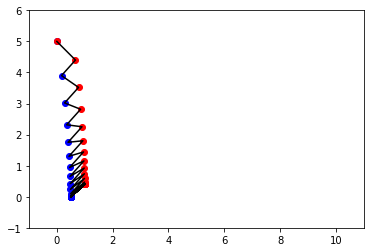

iteración  29
x= [0.49999609 0.        ]
z= [0.99999609 0.4       ]


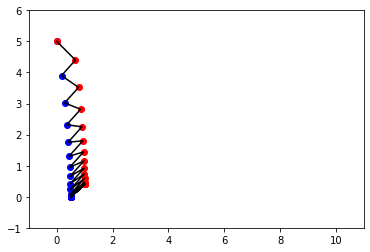

iteración  30
x= [0.49999739 0.        ]
z= [0.99999739 0.4       ]


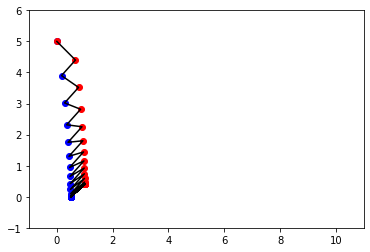

iteración  31
x= [0.49999826 0.        ]
z= [0.99999826 0.4       ]


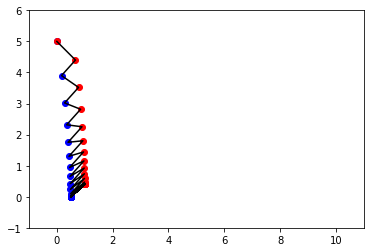

iteración  32
x= [0.49999884 0.        ]
z= [0.99999884 0.4       ]


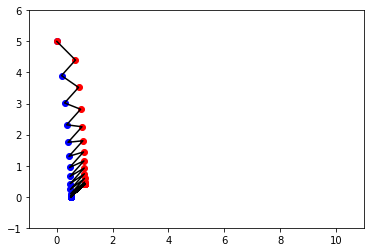

iteración  33
x= [0.49999923 0.        ]
z= [0.99999923 0.4       ]


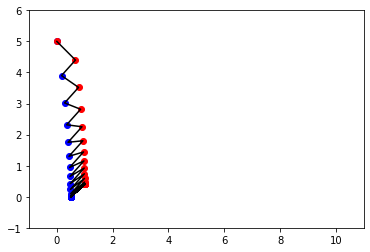

iteración  34
x= [0.49999948 0.        ]
z= [0.99999948 0.4       ]


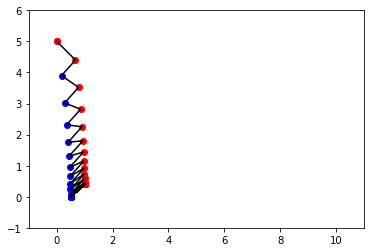

iteración  35
x= [0.49999966 0.        ]
z= [0.99999966 0.4       ]


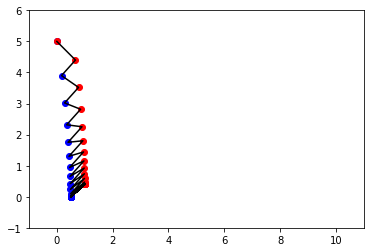

iteración  36
x= [0.49999977 0.        ]
z= [0.99999977 0.4       ]


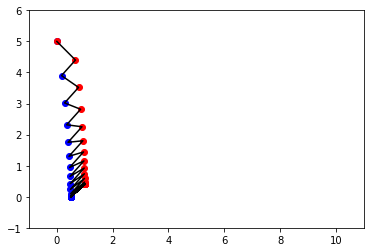

iteración  37
x= [0.49999985 0.        ]
z= [0.99999985 0.4       ]


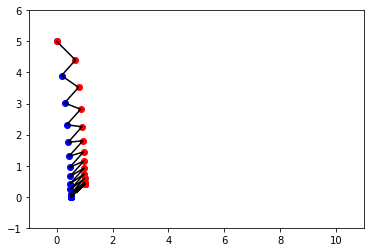

iteración  38
x= [0.4999999 0.       ]
z= [0.9999999 0.4      ]


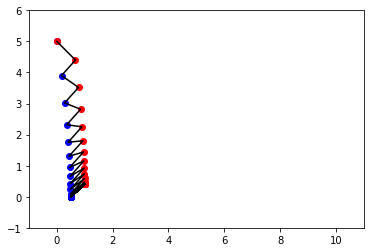

iteración  39
x= [0.49999993 0.        ]
z= [0.99999993 0.4       ]


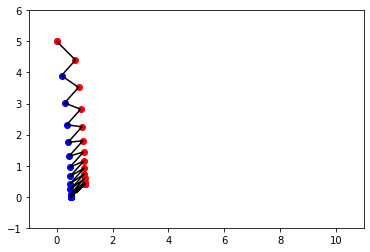

iteración  40
x= [0.49999995 0.        ]
z= [0.99999995 0.4       ]


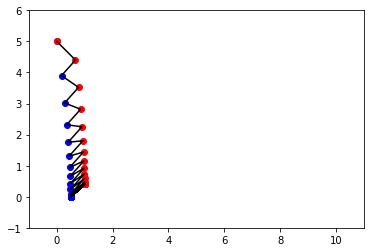

iteración  41
x= [0.49999997 0.        ]
z= [0.99999997 0.4       ]


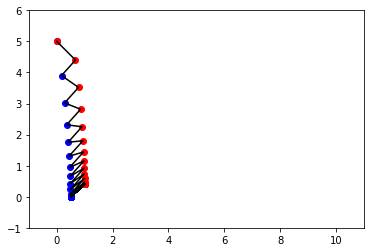

iteración  42
x= [0.49999998 0.        ]
z= [0.99999998 0.4       ]


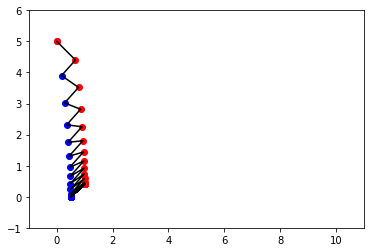

iteración  43
x= [0.49999999 0.        ]
z= [0.99999999 0.4       ]


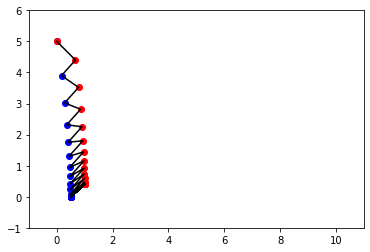

iteración  44
x= [0.49999999 0.        ]
z= [0.99999999 0.4       ]


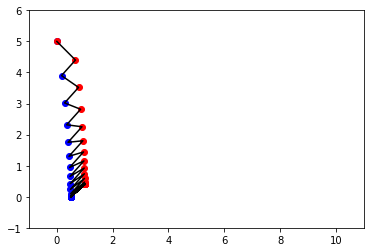

iteración  45
x= [0.49999999 0.        ]
z= [0.99999999 0.4       ]


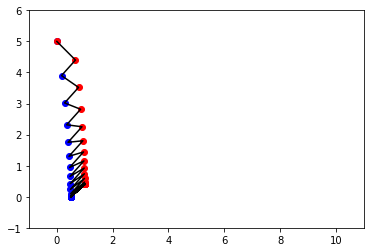

iteración  46
x= [0.5 0. ]
z= [1.  0.4]


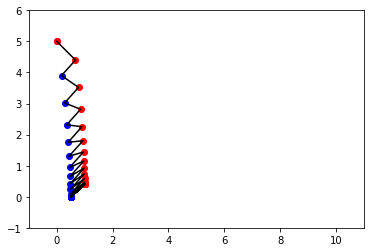

iteración  47
x= [0.5 0. ]
z= [1.  0.4]


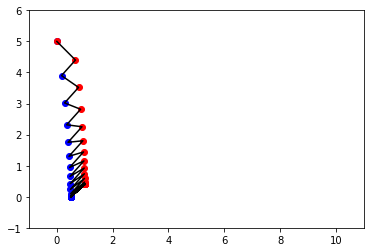

iteración  48
x= [0.5 0. ]
z= [1.  0.4]


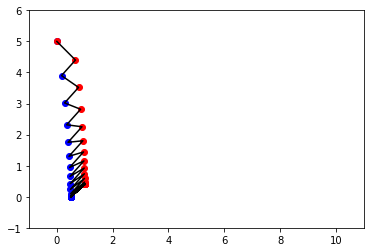

iteración  49
x= [0.5 0. ]
z= [1.  0.4]


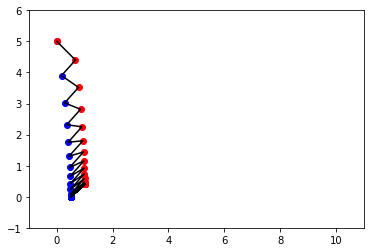

iteración  50
x= [0.5 0. ]
z= [1.  0.4]


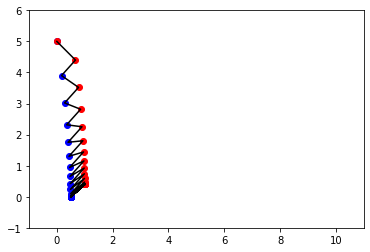

iteración  51
x= [0.5 0. ]
z= [1.  0.4]


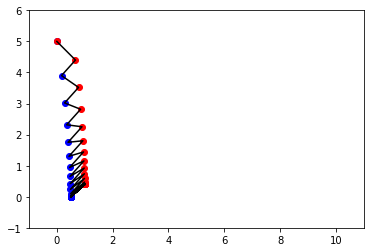

iteración  52
x= [0.5 0. ]
z= [1.  0.4]


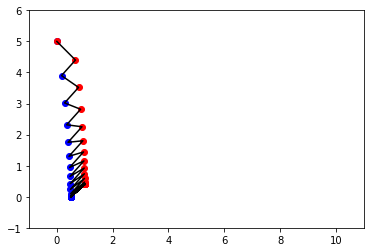

iteración  53
x= [0.5 0. ]
z= [1.  0.4]


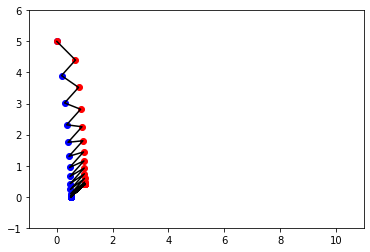

iteración  54
x= [0.5 0. ]
z= [1.  0.4]


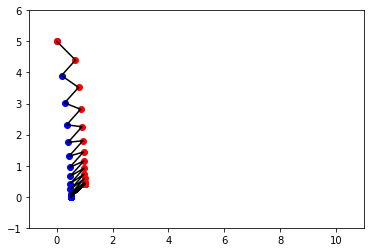

iteración  55
x= [0.5 0. ]
z= [1.  0.4]


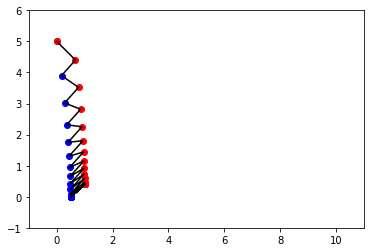

iteración  56
x= [0.5 0. ]
z= [1.  0.4]


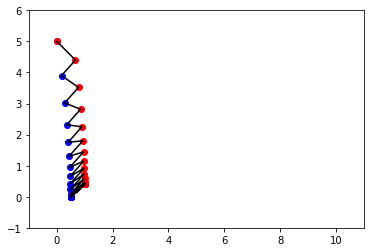

iteración  57
x= [0.5 0. ]
z= [1.  0.4]


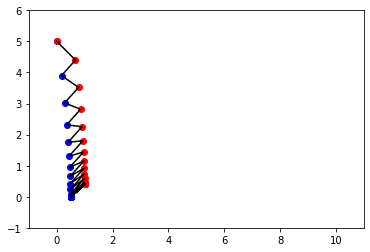

iteración  58
x= [0.5 0. ]
z= [1.  0.4]


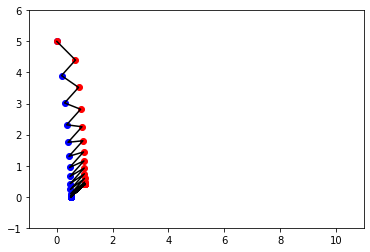

iteración  59
x= [0.5 0. ]
z= [1.  0.4]


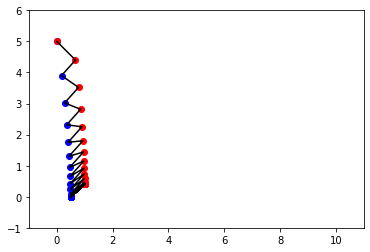

iteración  60
x= [0.5 0. ]
z= [1.  0.4]


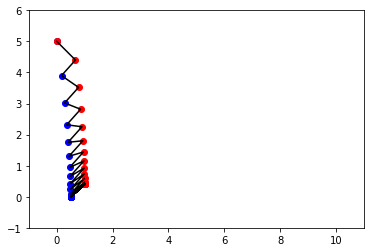

iteración  61
x= [0.5 0. ]
z= [1.  0.4]


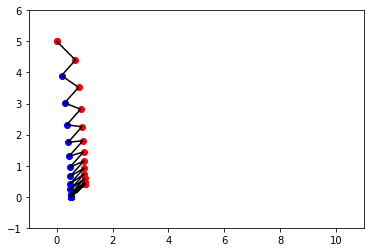

iteración  62
x= [0.5 0. ]
z= [1.  0.4]


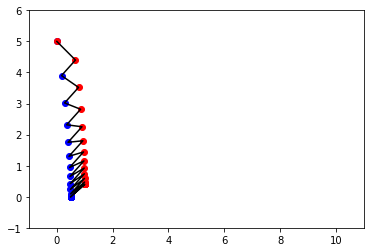

iteración  63
x= [0.5 0. ]
z= [1.  0.4]


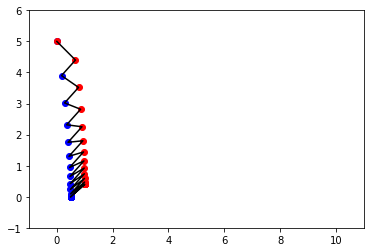

iteración  64
x= [0.5 0. ]
z= [1.  0.4]


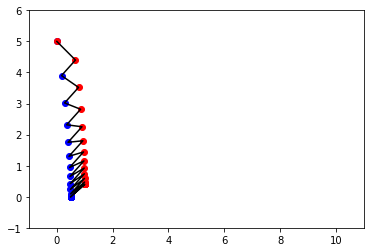

iteración  65
x= [0.5 0. ]
z= [1.  0.4]


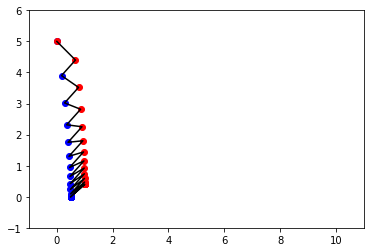

iteración  66
x= [0.5 0. ]
z= [1.  0.4]


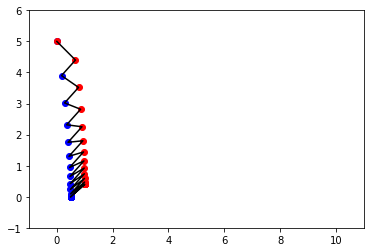

iteración  67
x= [0.5 0. ]
z= [1.  0.4]


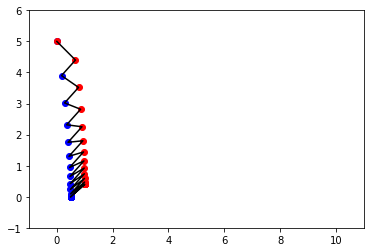

iteración  68
x= [0.5 0. ]
z= [1.  0.4]


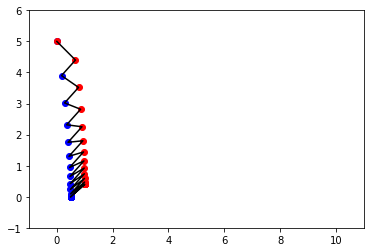

iteración  69
x= [0.5 0. ]
z= [1.  0.4]


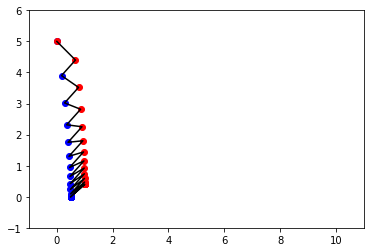

iteración  70
x= [0.5 0. ]
z= [1.  0.4]


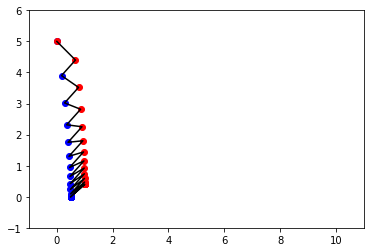

iteración  71
x= [0.5 0. ]
z= [1.  0.4]


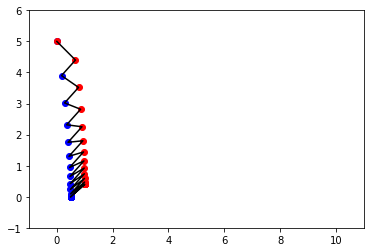

iteración  72
x= [0.5 0. ]
z= [1.  0.4]


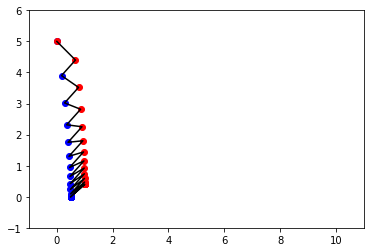

iteración  73
x= [0.5 0. ]
z= [1.  0.4]


KeyboardInterrupt: ignored

In [ ]:
def prox_QAbc(z,l):
  q=-np.array([2,1])
  
  x=(z-l*q)
  x[0]=x[0]/(1+l)
  x[1]=x[1]/(1+l/2)
  return x

x=np.array([0,5])
z=np.array([0,5])
lambd=0.5
x0s=np.array([])
x1s=np.array([])
z0s=np.array([])
z1s=np.array([])
xz0s=np.array([])
xz1s=np.array([])

for k in np.arange(100): 
  
  x0s=np.append(x0s,x[0])
  x1s=np.append(x1s,x[1])
  z0s=np.append(z0s,z[0])
  z1s=np.append(z1s,z[1])
  xz0s=np.append(xz0s,z[0])
  xz0s=np.append(xz0s,x[0])
  xz1s=np.append(xz1s,z[1])
  xz1s=np.append(xz1s,x[1])
  plt.plot(x0s,x1s,'bo',z0s,z1s,'ro',xz0s,xz1s,'k')
  plt.xlim(-1, 11)
  plt.ylim(-1, 6)
  
  plt.show()
  
  #display.clear_output(wait=True)
  #display.display(pl.gcf())
  print('iteración ', k)
  print('x=', x)
  print('z=', z)

  time.sleep(1)
  z=prox_QAbc(x,lambd)
  x=prox_l1norm(z,lambd)
  


¿Habremos llegado al óptimo?

\begin{align}
x&=\arg\min_x \lambda f(x)+\frac{1}{2}(x-z)^2\\
z&=\arg\min_z \lambda g(z)+\frac{1}{2}(z-x)^2
\end{align}


Luego 

\begin{align}
0&=\lambda \nabla f(x)+x-z\\
0&= \lambda \nabla g(z)+z-x
\end{align}

con lo que $ \nabla f(x) +  \nabla g(z)=0$

Pero nosotros queríamos 

$$ \nabla f(x) +  \nabla g(x)=0$$
 


 o bien

 $$ \nabla f(z) +  \nabla g(z)=0$$

Ni $z$ ni $x$ es óptimo

De hecho el óptimo podemos calcularlo suponiendo que la solución cumple $x\geq 0$

Entonces $$Px+q+\begin{pmatrix}
1\\1\end{pmatrix}=0$$

Esto es

\begin{align}
&x_1-2+1=0\\
&1/2x_2-1+1=0
\end{align}

con lo que 

$$x=\begin{pmatrix}
1\\0
\end{pmatrix}$$

#ADMM
Para que $x$ y $z$ converjan al mismo valor agregamos una variable $u^k$ que controla la diferencia entre  $x$ y $z$  

\begin{align}
x^{k+1}&=\text{prox}_{\lambda f}\left(z^k-u^k\right)\\
z^{k+1}&=\text{prox}_{\lambda g}\left(x^{k+1}+u^k\right)\\
u^{k+1}&=u^{k}+\left(x^{k+1}-z^{k+1}\right)
\end{align}

¿Funciona?

In [ ]:


x=np.array([0,5])
z=np.array([0,5])
u=np.array([0,0])
lambd=0.5
x0s=np.array([])
x1s=np.array([])
z0s=np.array([])
z1s=np.array([])
u0s=np.array([])
u1s=np.array([])
xz0s=np.array([])
xz1s=np.array([])

for k in np.arange(100): 
  
  x0s=np.append(x0s,x[0])
  x1s=np.append(x1s,x[1])
  u0s=np.append(u0s,u[0])
  u1s=np.append(u1s,u[1])
  z0s=np.append(z0s,z[0])
  z1s=np.append(z1s,z[1])
  xz0s=np.append(xz0s,x[0])
  xz0s=np.append(xz0s,z[0])
  xz1s=np.append(xz1s,x[1])
  xz1s=np.append(xz1s,z[1])
  plt.plot(x0s,x1s,'bs',z0s,z1s,'ro',xz0s,xz1s,'k',u0s,u1s,'og')
  plt.xlim(-2, 11)
  plt.ylim(-2, 6)
  plt.grid()
  plt.show()
  
  #display.clear_output(wait=True)
  #display.display(pl.gcf())
  print('iteración ', k)
  print('x=', x)
  print('z=', z)
  print('u=', u)
  

  time.sleep(1)
  x=prox_l1norm(z-u,lambd)
  z=prox_QAbc(x+u,lambd)
  u=u+x-z



#Relación con el Lagrangiano

Si consideramos el problema 

\begin{align}
\min_{x\ in\ \mathbb R^N, z\in \mathbb R^M }& f(x)+g(z)\\
\text{s. to: }& x=z
\end{align}

y su Lagrangiano con multiplicador $y\in\mathbb R^N$

$$L(x,z,y)=f(z)+g(x)  +y^T (x-z) + \frac{\rho}{2}||x-z||^2$$

entonces podríamos correr dual gradient ascent, minimizando el Lagrangiano en cada paso y luego actualizando el multiplicador

\begin{align}
\left(x^{k+1},z^{k+1}\right)&=\arg\min_{x,z}L \left(x,z,y^k\right)\\
y^{k+1}&=y^{k}+\rho \left(x^{k+1}-z^{k+1}\right)
\end{align}


El ADMM plantea la siguie te alternativa


\begin{align}
x^{k+1}&=\arg\min_{x}L \left(x,z^k,y^k\right)\\
z^{k+1}&=\arg\min_{z}L \left(x^{k+1},z,y^k\right)\\
y^{k+1}&=y^{k}+\rho \left(x^{k+1}-z^{k+1}\right)
\end{align}

Veamos que esto coincide con el ADMM como lo programamos más arriba

Primero expandimos el Lagrangiano
\begin{align}
x^{k+1}&=\arg\min_{x} f(x)+ y^{kT}(x-z^k) + \frac{\rho}{2} \left\|x-z^k\right\|)^2\\
z^{k+1}&=\arg\min_{z}  g(z)+ y^{kT}(x^{k+1}-z) + \frac{\rho}{2} \left\|x^{k+1}-z\right\|^2\\
y^{k+1}&=y^{k}+\rho \left(x^{k+1}-z^{k+1}\right)
\end{align}

luego completamos cuadrados
\begin{align}
x^{k+1}&=\arg\min_{x} f(x)  + \frac{\rho}{2} \left\|x-z^k+(1/\rho) y^k\right\|^2\\
z^{k+1}&=\arg\min_{z}  g(z)+ \frac{\rho}{2} \left\|x^{k+1}-z+(1/\rho) y^k\right\|^2\\
y^{k+1}&=y^{k}+\rho \left(x^{k+1}-z^{k+1}\right)
\end{align}


definimos $u^k=(1/\rho)y^k$
\begin{align}
x^{k+1}&=\arg\min_{x} f(x)  + \frac{\rho}{2} \left\|x-z^k+ u^k\right\|^2\\
z^{k+1}&=\arg\min_{z}  g(z)+ \frac{\rho}{2} \left\|x^{k+1}-z+u^k\right\|^2\\
u^{k+1}&=u^{k}+ \left(x^{k+1}-z^{k+1}\right)
\end{align}

e identificamos $\lambda=1/\rho$
\begin{align}
x^{k+1}&=\arg\min_{x} f(x)  + \frac{1}{2\lambda} \left\|x-z^k+ u^k\right\|^2\\
z^{k+1}&=\arg\min_{z}  g(z)+  \frac{1}{2\lambda} \left\|x^{k+1}-z+u^k\right\|^2\\
u^{k+1}&=u^{k}+ \left(x^{k+1}-z^{k+1}\right)
\end{align}

Asi llegamos como queríamos a

\begin{align}
x^{k+1}&=\text{prox}_{\lambda f}(z^k- u^k)\\
z^{k+1}&=\text{prox}_{\lambda g}(x^{k+1}+ u^k)\\
u^{k+1}&=u^{k}+ \left(x^{k+1}-z^{k+1}\right)
\end{align}





#Optimización distribuida (ADMM)

$$\min_{x\in\mathbb R^M}  \sum_{i=1}^{N} f_{i}(x)$$


Es equivalente a

\begin{align}
\min_{x_1\in\mathbb R^M,x_2\in\mathbb R^M,\ldots,x_N\in\mathbb R^M} & \sum_{i=1}^{N} f_{i}\left(x_{i}\right)\\
 \text{subject to:} &\quad x_{1}=x_{2}=\cdots=x_{N}
 \end{align}

También equivalente a 


\begin{align}
\min_{x_1\in\mathbb R^M,x_2\in\mathbb R^M,\ldots,x_N\in\mathbb R^M} & \sum_{i=1}^{N} f_{i}\left(x_{i}\right)+ I_{C}\left(x_1,x_2,\ldots,x_N\right)
  \end{align}

donde

 $${C}=\left\{\left(x_{1}, \ldots, x_{N}\right) \mid x_{1}=\cdots=x_{N}\right\}$$


 Este problema puede ser llevado a la forma de ADMM


\begin{align}
\min_{x_1\in\mathbb R^M,x_2\in\mathbb R^M,\ldots,x_N\in\mathbb R^M} & \sum_{i=1}^{N} f_{i}\left(x_{i}\right)+ I_{C}\left(z_1,z_2,\ldots,z_N\right)\\
\text{s to:}& (x_1,x_2,\ldots,x_N)=(z_1,z_2,\ldots,z_N)
  \end{align}



\begin{align}
 x^{k+1}&=\text{prox}_{\lambda \sum f_i}(z^k- u^k)\\
z^{k+1}&=\text{prox}_{\lambda I_C}(x^{k+1}+ u^k)\\
u^{k+1}&=u^{k}+ \left(x^{k+1}-z^{k+1}\right)
\end{align}


La primer parte quedó distribuida, veámoslo

\begin{align} 
x^{k+1}&=\text{prox}_{\lambda \sum f_i}(z^k- u^k)\\
&=\arg\min_{x_1,\ldots,x_N} \lambda \sum_i f_i(x_i) + \frac{1}{2} ||x-z^k+u^k||^2\\
&=\arg\min_{x_1,\ldots,x_N} \sum_i \left( \lambda f_i(x_i) +  \frac{1}{2} ||x_i-z_i^k+u_i^k||^2\right)
\end{align}

Luego $x_i^{k+1}=\text{prox}_{\lambda f_i}(z_i^k- u_i^k)$

Entonces el operador  proximal de $x_i$ puede implementarse en forma distribuida 
\begin{align}
 x_1^{k+1}&=\text{prox}_{\lambda  f_1}(z_1^k- u_1^k)\\
 x_2^{k+1}&=\text{prox}_{\lambda  f_2}(z_2^k- u_2^k)\\
 \vdots&\\
 x_N^{k+1}&=\text{prox}_{\lambda  f_N}(z_N^k- u_N^k)\\
 z^{k+1}&=\text{prox}_{\lambda I_C}(x^{k+1}+ u^k)\\
u^{k+1}&=u^{k}+ \left(x^{k+1}-z^{k+1}\right)
\end{align}

Ahora atendamos $z^{k+1}=\text{prox}_{\lambda I_C}(x^{k+1}+ u^k)$


Sabemos (obligatorio 4) $\text{prox}_{\lambda I_C}(y)=\Pi_C(y)$

En este caso 
\begin{align}z=\Pi_C(y)
&=\arg\min_{(z_1,\ldots,z_N)\in C} ||z-y||^2\\
&=\arg\min_{(z_1,\ldots,z_N)\in C} \sum_i ||z_i-y_i||^2\\
&=\arg\min_{(z_1=z_2=\ldots=z_N)} \sum_i ||z_i-y_i||^2\\
&=\arg\min_{(\bar z,\bar z, \ldots, \bar z)} \sum_i ||\bar z-y_i||^2\\
\end{align}

Es decir que todos los $z_i$ son iguales, y son la solución a
\begin{align}
&z_i=\arg\min_{\bar z} \sum_i ||\bar z-y_i||^2\\
&=\arg\min_{\bar z } \sum_i ||\bar z||^2 -2 y_i^T \bar z+ ||y_i||^2\\
&=\arg\min_{\bar z}  N ||\bar z||^2 -2 \left(\sum_i y_i\right)^T \bar z\\
&= \left(\sum_i y_i\right)/N\\
&=\bar y 
\end{align}

donde definimos $\bar y= \left(\sum_i z_i\right)/N$, es decir, el promedio

Luego $z_i^{k+1}=\bar x^{k+1}+ \bar u^k=\frac{\sum_{i=1}^N  x_i^{k+1}}{N}+\frac{\sum_{i=1}^N u^k_i}{N}$




Falta ver que pasa con $u^k$.

Tomemos el caso en que $u^0=0$, entonces
$$u^1= x^1-z^1$$

Es decir

$$u_i^1= x_i^1-z_i^1$$

Luego  

\begin{align}
\bar u^1&:=\frac{1}{N}\sum_{i=1}^N u_i^1\\
 &=\frac{1}{N} \sum_i x^1_i - \frac{1}{N} \sum_i z^1_i \\
&= \frac{1}{N} \sum_i x^1_i - \frac{1}{N}  \sum_i (\bar x^1 +\bar u^0) \\
&= \frac{1}{N} \sum_i x^1_i -\frac{1}{N}  \sum_i (\bar x^1 ) \\
&= \frac{1}{N} \sum_i x^1_i -\bar x^1  \\
&= 0
\end{align}


Entonces $\bar u^1=0$.

Podemos repetir esto recursivamente para $k>1$ y concluir que $\bar u^k=0$ para todo $k$.

Luego, el paso en $z$ se reduce a 
$z^{k+1}_i=\bar x^{k+1}$




Véase también que 




$$u^{k+1}=u^{k}+ \left(x^{k+1}-z^{k+1}\right)$$
puede distribuirse

$$u_i^{k+1}=u_i^{k}+ \left(x_i^{k+1}-z_i^{k+1}\right)$$

Uniendo las partes

\begin{align}
 x_i^{k+1}&=\text{prox}_{\lambda f_i}(z_i^k- u_i^k)\\
 z_i^{k+1}&=\bar x^{k+1}\\
u_i^{k+1}&=u_i^{k}+ \left(x_i^{k+1}-z_i^{k+1}\right)
\end{align}

Como todos los $z_i$ son iguales, podemos conservar uno solo $ z^{k+1}=\bar x^{k+1} \in \mathbb R^M$


Así llegamos a

\begin{align}
 x_i^{k+1}&=\text{prox}_{\lambda  f_i}(z^k- u_i^k)\\
 z^{k+1}&=\bar x^{k+1}\\
u_i^{k+1}&=u_i^{k}+ \left(x_i^{k+1}-z^{k+1}\right)
\end{align}

El operador proximal es local, minimizando en la variable local $x_i$ con información local de $f_i$. El multiplicador $u_i$ también se actualiza localmente. Se necesita coordinación para obtener el promedio de los valores $x_i$. 

O bien se puede hacer un mecanismo para lograr el promedio en forma distribuida, o bien replantear el problema con restricciones que involucren consenso dos a dos o en grupos entre agentes cercanos.


In [ ]:

def cuadrados_minimos(A,b):
 
  AT=np.transpose(A)
  ATA=np.dot(AT,A)
  ATAinv=np.linalg.inv(ATA)
  ATb=np.dot(AT,b)
  x=np.dot(ATAinv,ATb)
  return x



A=[[2, 1],
   [1, 2],
   [1, 0],
   [2, 2]]

A1=[[2, 1],
   [1, 2]]
   
A2=[[1, 0],
   [2, 2]]

b=[[3.1],
   [2.9],
   [1.1],
   [3.9]]

b1=[[3.1],
   [2.9]]

b2=[[1.1],
   [3.9]]

x=[[1],
   [1]]

print(cuadrados_minimos(A,b))
print(cuadrados_minimos(A1,b1))
print(cuadrados_minimos(A2,b2))

[[1.09230769]
 [0.88461538]]
[[1.1]
 [0.9]]
[[1.1 ]
 [0.85]]


Vamos a resolver mínimos cuadrados distribuido

Se quiere encontrar $x$

El agente 1 mide  $b_1=A_1 x+ n_1$

El agente 2 mide  $b_2=A_2 x+ n_2$

Queremos resolver

\begin{align}
\min_x &\frac{1}{2} ||A_1x-b_1||^2+\frac{1}{2} ||A_2x-b_2||^2
\end{align}

Eqivalente a
\begin{align}
\min_{x_1,x_2} &\frac{1}{2} ||A_1x_1-b_1||^2+\frac{1}{2} ||A_2x_2-b_2||^2
\text{s. to: }x_1=x_2
\end{align}


Usaremos ADMM con consensus

\begin{align}
 x_i^{k+1}&=\text{prox}_{\lambda  f_i}(z^k- u_i^k)\\
 z^{k+1}&=\bar x^{k+1}\\
u_i^{k+1}&=u_i^{k}+ \left(x_i^{k+1}-z^{k+1}\right)
\end{align}

El operador proximal de $\frac{1}{2} ||Ax-b||^2$ resuleve

$$\arg\min_x \frac{\lambda}{2} ||Ax-b||^2 + \frac{1}{2}||x-z||^2$$

$$=(\lambda A^TA+I)^{-1}(\lambda A^T b +z)$$



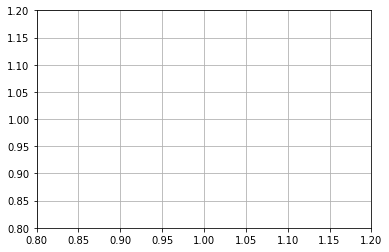

iteración  0
x1= [[0], [0]]
x2= [[0.5], [0]]
z= [[0], [0]]
u1= [[0], [0]]
u2= [[0], [0]]


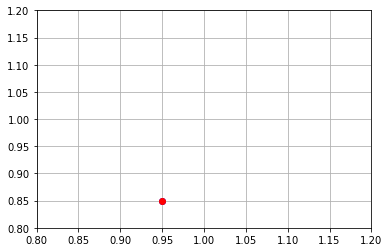

iteración  1
x1= [[0.95]
 [0.85]]
x2= [[0.95]
 [0.85]]
z= [[0.95]
 [0.85]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


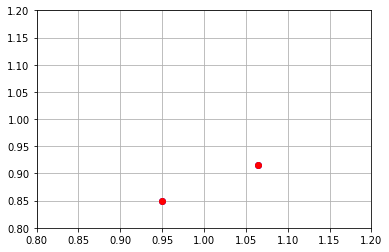

iteración  2
x1= [[1.065]
 [0.915]]
x2= [[1.065]
 [0.915]]
z= [[1.065]
 [0.915]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


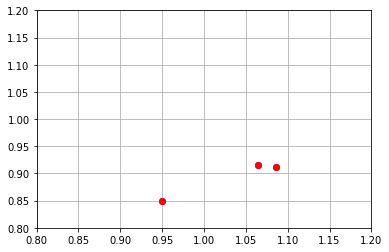

iteración  3
x1= [[1.0865]
 [0.9115]]
x2= [[1.0865]
 [0.9115]]
z= [[1.0865]
 [0.9115]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


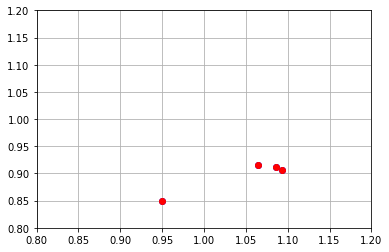

iteración  4
x1= [[1.09365]
 [0.90615]]
x2= [[1.09365]
 [0.90615]]
z= [[1.09365]
 [0.90615]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


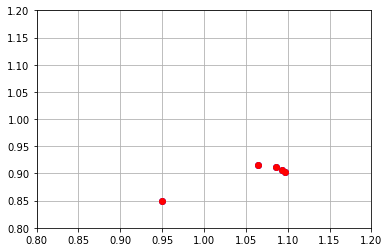

iteración  5
x1= [[1.096865]
 [0.903115]]
x2= [[1.096865]
 [0.903115]]
z= [[1.096865]
 [0.903115]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


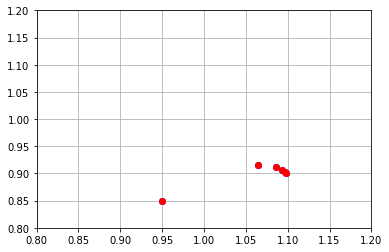

iteración  6
x1= [[1.0984365]
 [0.9015615]]
x2= [[1.0984365]
 [0.9015615]]
z= [[1.0984365]
 [0.9015615]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


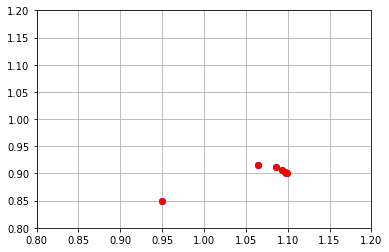

iteración  7
x1= [[1.09921865]
 [0.90078115]]
x2= [[1.09921865]
 [0.90078115]]
z= [[1.09921865]
 [0.90078115]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


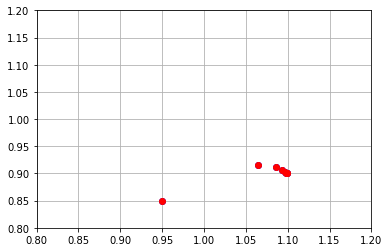

iteración  8
x1= [[1.09960936]
 [0.90039062]]
x2= [[1.09960936]
 [0.90039062]]
z= [[1.09960936]
 [0.90039062]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


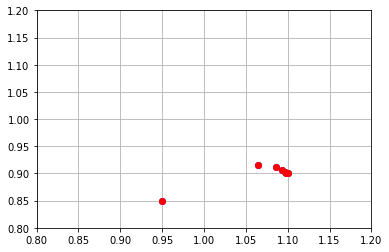

iteración  9
x1= [[1.09980469]
 [0.90019531]]
x2= [[1.09980469]
 [0.90019531]]
z= [[1.09980469]
 [0.90019531]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


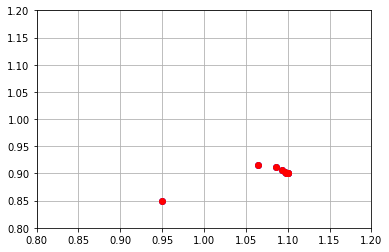

iteración  10
x1= [[1.09990234]
 [0.90009766]]
x2= [[1.09990234]
 [0.90009766]]
z= [[1.09990234]
 [0.90009766]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


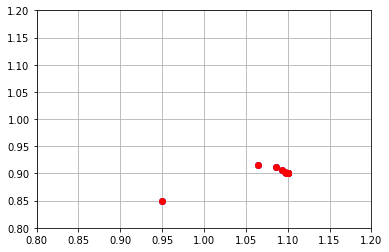

iteración  11
x1= [[1.09995117]
 [0.90004883]]
x2= [[1.09995117]
 [0.90004883]]
z= [[1.09995117]
 [0.90004883]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


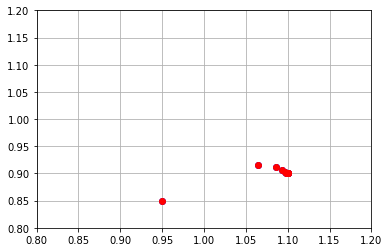

iteración  12
x1= [[1.09997559]
 [0.90002441]]
x2= [[1.09997559]
 [0.90002441]]
z= [[1.09997559]
 [0.90002441]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


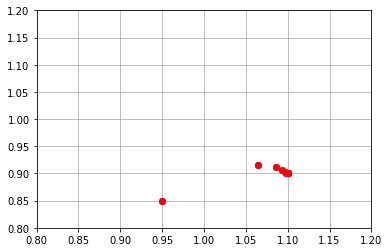

iteración  13
x1= [[1.09998779]
 [0.90001221]]
x2= [[1.09998779]
 [0.90001221]]
z= [[1.09998779]
 [0.90001221]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


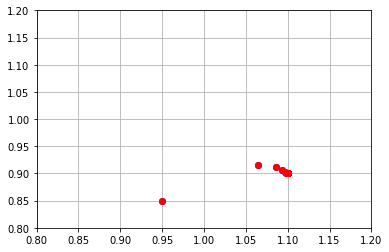

iteración  14
x1= [[1.0999939]
 [0.9000061]]
x2= [[1.0999939]
 [0.9000061]]
z= [[1.0999939]
 [0.9000061]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


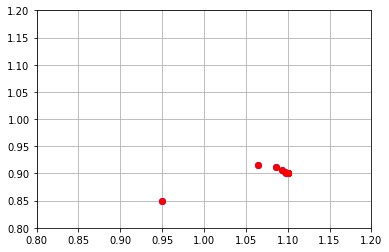

iteración  15
x1= [[1.09999695]
 [0.90000305]]
x2= [[1.09999695]
 [0.90000305]]
z= [[1.09999695]
 [0.90000305]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


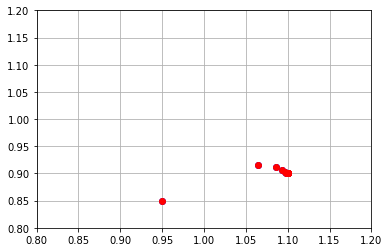

iteración  16
x1= [[1.09999847]
 [0.90000153]]
x2= [[1.09999847]
 [0.90000153]]
z= [[1.09999847]
 [0.90000153]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


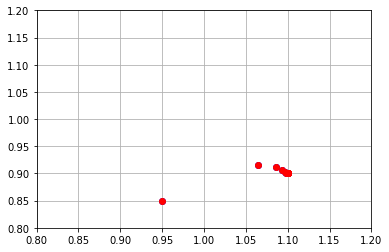

iteración  17
x1= [[1.09999924]
 [0.90000076]]
x2= [[1.09999924]
 [0.90000076]]
z= [[1.09999924]
 [0.90000076]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


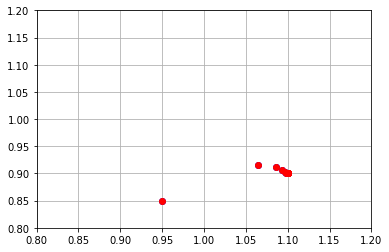

iteración  18
x1= [[1.09999962]
 [0.90000038]]
x2= [[1.09999962]
 [0.90000038]]
z= [[1.09999962]
 [0.90000038]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


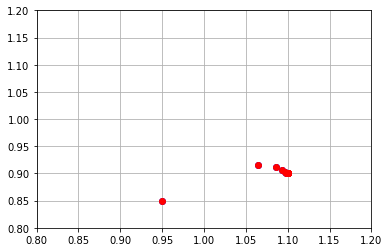

iteración  19
x1= [[1.09999981]
 [0.90000019]]
x2= [[1.09999981]
 [0.90000019]]
z= [[1.09999981]
 [0.90000019]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


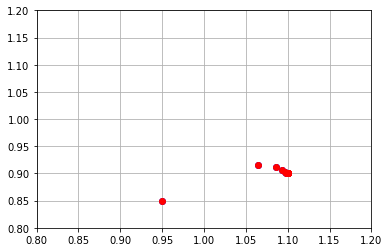

iteración  20
x1= [[1.0999999]
 [0.9000001]]
x2= [[1.0999999]
 [0.9000001]]
z= [[1.0999999]
 [0.9000001]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


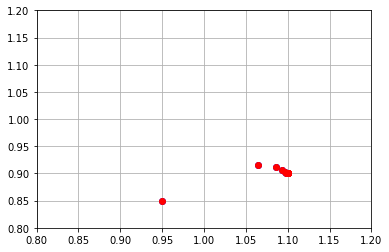

iteración  21
x1= [[1.09999995]
 [0.90000005]]
x2= [[1.09999995]
 [0.90000005]]
z= [[1.09999995]
 [0.90000005]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


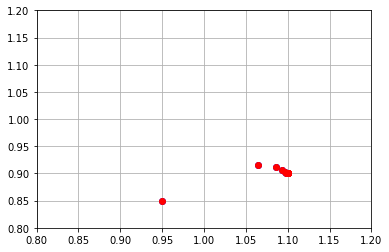

iteración  22
x1= [[1.09999998]
 [0.90000002]]
x2= [[1.09999998]
 [0.90000002]]
z= [[1.09999998]
 [0.90000002]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


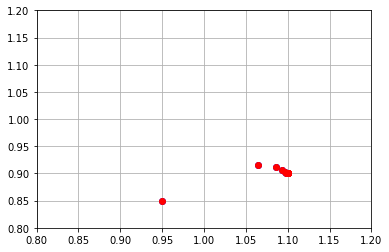

iteración  23
x1= [[1.09999999]
 [0.90000001]]
x2= [[1.09999999]
 [0.90000001]]
z= [[1.09999999]
 [0.90000001]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


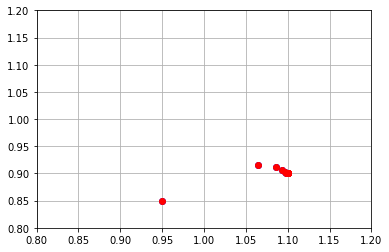

iteración  24
x1= [[1.09999999]
 [0.90000001]]
x2= [[1.09999999]
 [0.90000001]]
z= [[1.09999999]
 [0.90000001]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


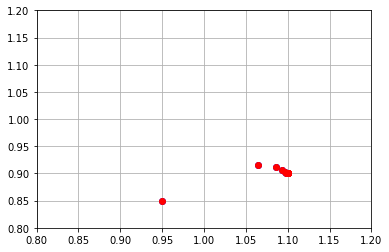

iteración  25
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


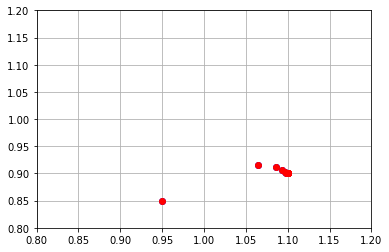

iteración  26
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


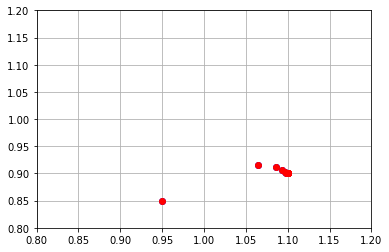

iteración  27
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


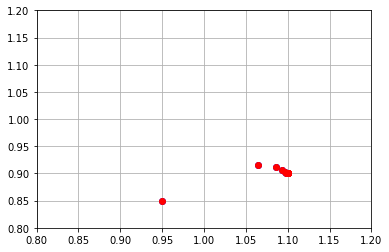

iteración  28
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


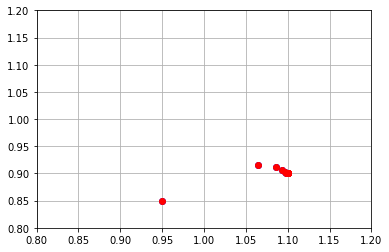

iteración  29
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


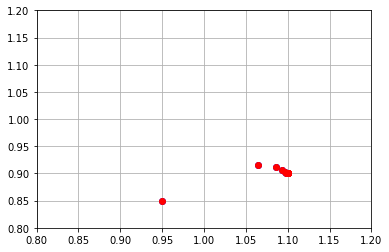

iteración  30
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


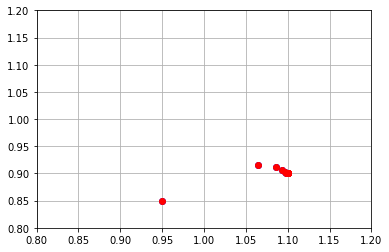

iteración  31
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


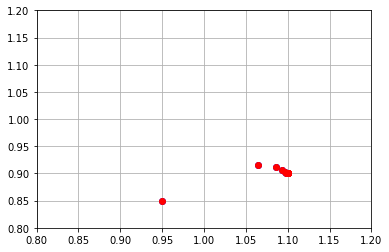

iteración  32
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


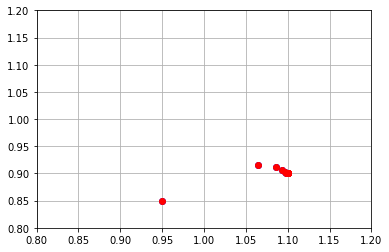

iteración  33
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


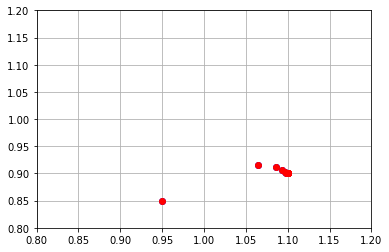

iteración  34
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


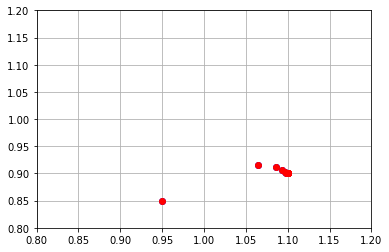

iteración  35
x1= [[1.1]
 [0.9]]
x2= [[1.1]
 [0.9]]
z= [[1.1]
 [0.9]]
u1= [[0.]
 [0.]]
u2= [[0.]
 [0.]]


KeyboardInterrupt: ignored

In [ ]:
def prox_cuadrados_minimos(A,b,lambd,z):
  AT=np.transpose(A)
  lATA=lambd*np.dot(AT,A)
  I=[[1,0],
     [0,1]]
  B=lATA+I
  Binv=np.linalg.inv(B)
  lATb=lambd*np.dot(AT,b)
  x=np.dot(Binv,lATb+z)
  return x

x1_0s=np.array([])
x1_1s=np.array([])
x2_0s=np.array([])
x2_1s=np.array([])
zu1=[[0],
    [0]]
zu2=[[0],
    [0]]
x1=[[0],
    [0]]
x2=[[0.5],
    [0]]
z=[[0],
   [0]]
u1=[[0],
   [0]]
u2=[[0],
   [0]]
lambd=1
for k in np.arange(100): 
  
  x1_0s=np.append(x1_0s,x1[0])
  x1_1s=np.append(x1_1s,x1[1])
  x2_0s=np.append(x2_0s,x2[0])
  x2_1s=np.append(x2_1s,x2[1])
  #u0s=np.append(u0s,u[0])
  #u1s=np.append(u1s,u[1])
  #z0s=np.append(z0s,z[0])
  #z1s=np.append(z1s,z[1])
  plt.plot(x1_0s,x1_1s,'bo',x2_0s,x2_1s,'ro')
  plt.xlim(0.8, 1.2)
  plt.ylim(0.8, 1.2)
  plt.grid()
  plt.show()
  
  #display.clear_output(wait=True)
  #display.display(pl.gcf())
  print('iteración ', k)
  print('x1=', x1)
  print('x2=', x2)
  print('z=', z)
  print('u1=', u1)
  print('u2=', u2)
  

  
  time.sleep(1)
  x1=prox_cuadrados_minimos(A1,b1,lambd,zu1)
  x2=prox_cuadrados_minimos(A1,b1,lambd,zu2)
  z=(x1+x2)/2
  
  u1+=x1-z
  u2+=x2-z
  zu1=z-u1
  zu2=z-u2